In [2]:
import pandas as pd

In [31]:
bulk = pd.read_csv("bulk_group_1.csv", usecols=['gene_id'])
bulk.head()

,gene_id
0,GSM2560245_2
1,GSM2560245_7
2,GSM2560245_11
3,GSM2560245_12
4,GSM2560245_18


In [4]:
df.drop(columns=['gene_id'], inplace=True)
df = df.astype('uint16')

In [5]:
df.shape

(15165, 7544)

In [6]:
from sklearn.decomposition import NMF
import numpy as np
from sklearn.cluster import SpectralClustering
from sklearn.manifold import TSNE

In [7]:
import matplotlib.pyplot as plt

In [8]:
nmf = NMF(n_components=50)
df = nmf.fit_transform(df)

In [32]:
df = pd.DataFrame(df)
df.insert(0, 'cell_id', bulk['gene_id'])

In [34]:
df.head()
df.to_csv("grp1_nmf_50_dims.csv", index=False)

In [9]:
embed_data = TSNE(n_components=2, n_iter=5000).fit_transform(df)

In [24]:
embed_df = pd.DataFrame(embed_data)
embed_df.to_csv("tsne5000_grp1.csv", index=False)

In [10]:
colors = ['brown', 'blue', 'orange', 'darkcyan', 'green', 'yellow', 'red', 'brown', 'blue', 'black', 'cyan']

In [21]:
def scatter_plot_clusters(df):
    plt.figure(figsize=(10, 10))
    number_of_clusters = max(df['labels']) + 1
    for j in range(-1, number_of_clusters):
        if j == -1:
            label = 'noise'
        else:
            label = 'cluster %d' % j

        cluster = df.loc[df['labels'] == j]
        plt.scatter(x=cluster.iloc[:, 0],
                    y=cluster.iloc[:, 1],
                    color=colors[j],
                    label=label,
                    alpha=0.75,
                    edgecolor='black')

    plt.title("Spektralno klasterovanje + NMF dekompozicija")
    plt.legend()
    
    #plt.savefig("slike\\nmf_spectral" + str(number_of_clusters))
    plt.show()


In [12]:
from sklearn.cluster import SpectralClustering

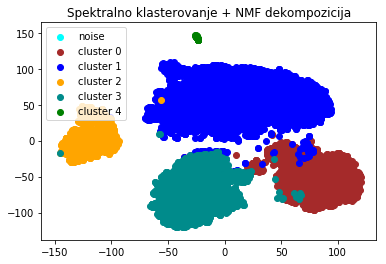

In [14]:
x = pd.DataFrame(embed_data)
clustering = SpectralClustering(n_clusters=5, affinity='nearest_neighbors').fit(df)
x['labels'] = clustering.labels_
scatter_plot_clusters(x)

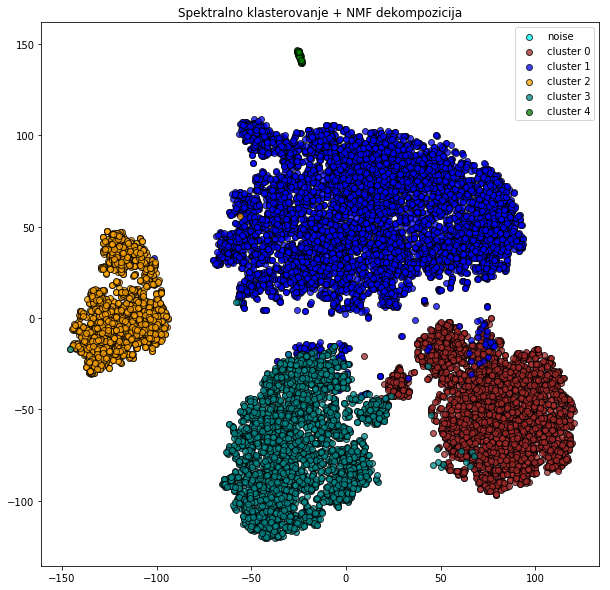

In [22]:
scatter_plot_clusters(x)